In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib as mpl


def plot_adata(adata_to_plot, cluster_key, plot_type="umap"):
    if plot_type == "spatial":

        coords = adata_to_plot.obsm['spatial'].copy()
        df = pd.DataFrame(coords, columns=['x', 'y'], index=adata_to_plot.obs_names)

        df[cluster_key] = adata_to_plot.obs[cluster_key].astype(str)

        tab20 = [mpl.colors.rgb2hex(c) for c in plt.get_cmap('tab20').colors]

        fig = px.scatter(
            df,
            x='x',
            y='y',
            color=cluster_key,
            title='Spatial scatter — manual cell types',
            #color_discrete_sequence=tab20,
            hover_name=df.index,
            width=1600,
            height=700
        )

        fig.update_traces(marker=dict(size=2, opacity=0.8))
        fig.update_yaxes(autorange='reversed')
        fig.update_layout(
            legend_title_text=cluster_key,
            legend=dict(
                itemsizing='constant',
                traceorder='normal',
                bgcolor='rgba(255,255,255,0.5)',
                x=1.02, y=1
            ),
            margin=dict(l=20, r=200, t=50, b=20)
        )

        fig.show()



    elif plot_type == "umap":

        df = pd.DataFrame(
            adata_to_plot.obsm['X_umap'],
            columns=['UMAP1', 'UMAP2'],
            index=adata_to_plot.obs_names
        ).copy()

        df[cluster_key] = adata_to_plot.obs[cluster_key].astype(str)

        tab20 = [mpl.colors.rgb2hex(c) for c in plt.get_cmap('tab20').colors]

        fig = px.scatter(
            df,
            x='UMAP1',
            y='UMAP2',
            color=cluster_key,
            title='UMAP embedding — Leiden clusters',
            color_discrete_sequence=tab20,
            hover_name=df.index,
            width=1400,
            height=1200
        )

        fig.update_traces(marker=dict(size=3, opacity=0.8))
        fig.update_layout(
            legend_title_text='Leiden cluster',
            legend=dict(
                itemsizing='constant',
                traceorder='normal',
                bgcolor='rgba(255,255,255,0.5)',
                x=1.02, y=1
            ),
            margin=dict(l=20, r=200, t=50, b=20)
        )

        fig.show()

In [1]:
import novae
import scanpy as sc


adatas = list()


for Tissue, TableFolder in [["Region1","REGION1_TABLES"],["Region2","REGION2_TABLES"],["Region3","REGION3_TABLES"]]:    
    in_out_path = f"/Volumes/ProstateCancerEvoMain/dbs/Ongoing/{Tissue}/{TableFolder}"
    adata_xenium_p= f"{in_out_path}/{Tissue}_Xenium_Phen_HE_Integrated.Xenium_Process_Table.Cell_Type_Annotated_Auto.V3.All_Genes.h5ad"
    adatas.append(sc.read_h5ad(adata_xenium_p))


In [2]:
novae.settings.auto_preprocessing = False
novae.spatial_neighbors(adatas, radius=80)


[INFO] (novae.utils._build) Computing graph on 113,273 cells (coord_type=generic, delaunay=True, radius=[0.0, 80.0], n_neighs=None)
[INFO] (novae.utils._build) Computing graph on 299,769 cells (coord_type=generic, delaunay=True, radius=[0.0, 80.0], n_neighs=None)
[INFO] (novae.utils._build) Computing graph on 169,163 cells (coord_type=generic, delaunay=True, radius=[0.0, 80.0], n_neighs=None)


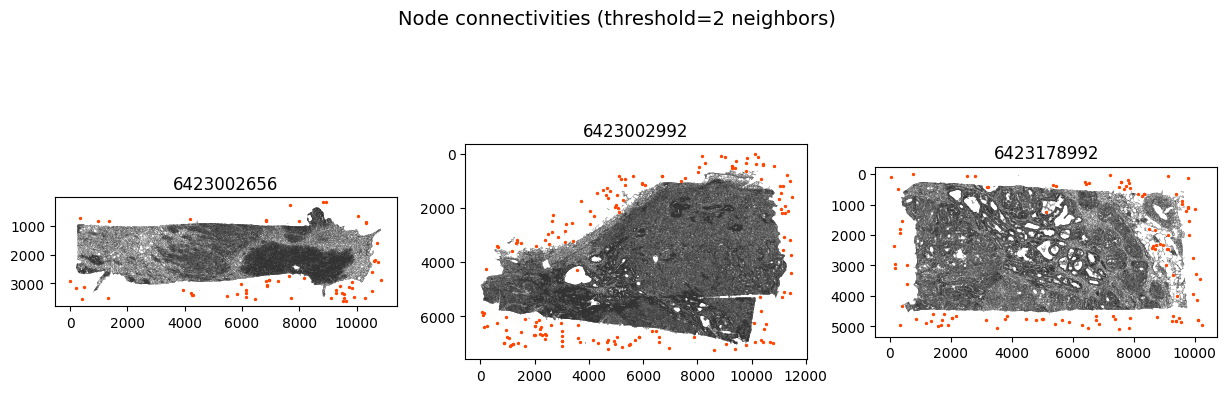

In [3]:
novae.plot.connectivities(adatas)

In [4]:
model = novae.Novae.from_pretrained("MICS-Lab/novae-human-0", cache_dir="/Users/ugursahin/Downloads")
model

Novae model
   ├── Known genes: 60697
   ├── Parameters: 32.0M
   └── Model name: MICS-Lab/novae-human-0

In [5]:
# Option 1: zero-shot
# Suppose adatas is a list; pick the one with most cells yourself
model.compute_representations(adatas, zero_shot=True, reference="all")
# Option 2: fine-tuning
#model.fine_tune(adatas)
#model.compute_representations(adatas)

[WARNING] (novae.utils._validate) Found some negative values in adata.X. We recommended having unscaled data (raw counts or log1p)
[WARNING] (novae.utils._validate) Found some negative values in adata.X. We recommended having unscaled data (raw counts or log1p)
[WARNING] (novae.utils._validate) Found some negative values in adata.X. We recommended having unscaled data (raw counts or log1p)


Computing representations:   0%|          | 0/222 [00:00<?, ?it/s]

Computing representations:   0%|          | 0/586 [00:00<?, ?it/s]

Computing representations:   0%|          | 0/331 [00:00<?, ?it/s]

In [6]:
model.assign_domains(adatas, level=13)

'novae_domains_13'

[INFO] (novae.utils._validate) Using obs_key='novae_domains_13' by default.
/Users/ugursahin/miniforge3/envs/SOPA/lib/python3.10/site-packages/novae/plot/_spatial.py:72: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(
/Users/ugursahin/miniforge3/envs/SOPA/lib/python3.10/site-packages/novae/plot/_spatial.py:72: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(
/Users/ugursahin/miniforge3/envs/SOPA/lib/python3.10/site-packages/novae/plot/_spatial.py:72: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(


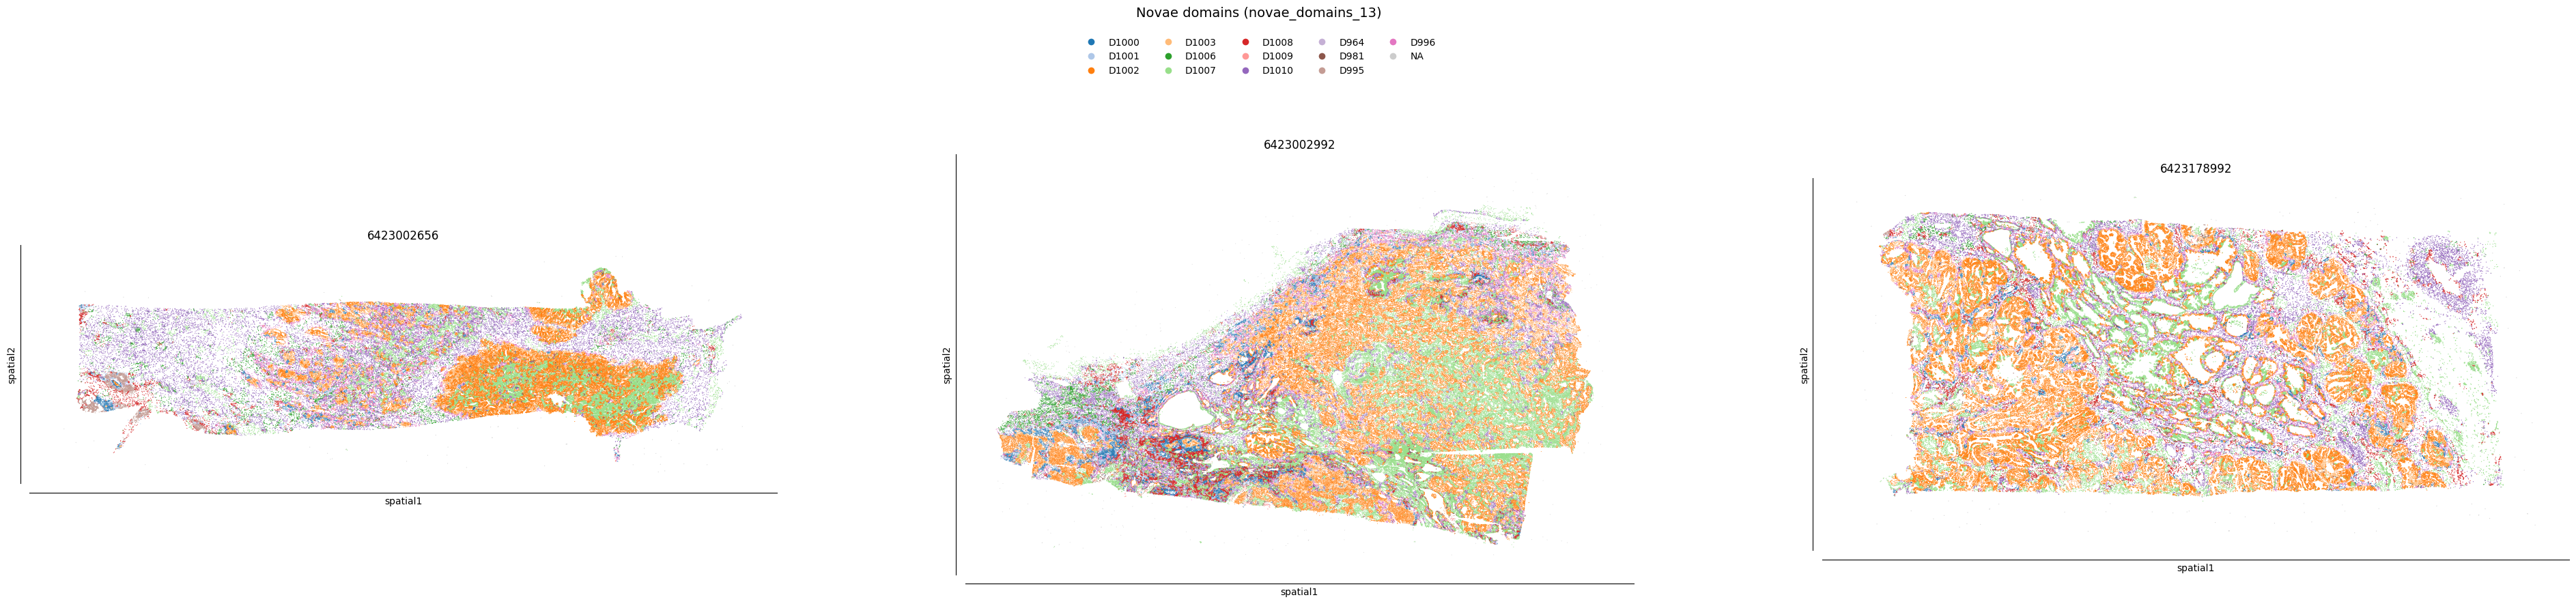

In [7]:
novae.plot.domains(adatas, fig_size_per_slide=(16,8))

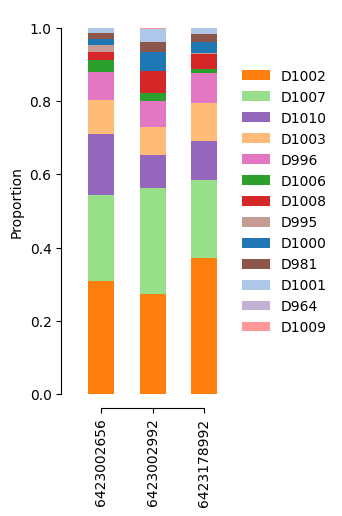

In [9]:
novae.plot.domains_proportions(adatas, obs_key="novae_domains_13")